In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

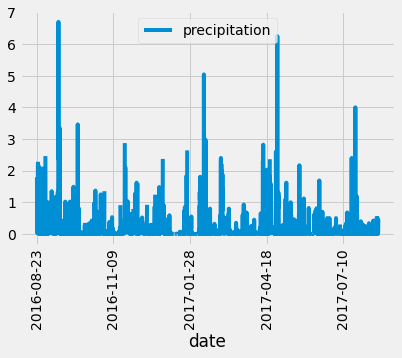

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017,8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=["date","precipitation"])
df.set_index(df['date'], inplace = True)

# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)


In [21]:
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9,)]

In [27]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Select Station count(station) from Measurement
# Group by Station
# ORder by count(station)desc


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


# Select min(tobs), max(tobs), avg(tobs) from measurement
# Where station = 'USC00519281'

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


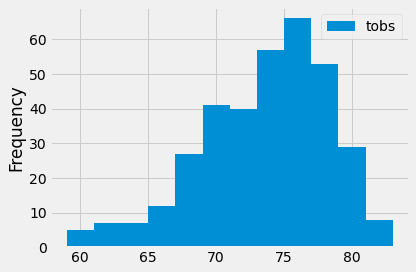

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns = ['tobs'])

print(df)

df.plot.hist(bins=12)
plt.tight_layout()

In [41]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temp(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temp('2012-02-28','2012-03-05'))
                         


[(62.0, 69.57142857142857, 74.0)]


# Challenge

In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [49]:
import numpy as np
import pandas as pd


In [50]:
import datetime as dt

In [51]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [47]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [52]:
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [53]:
Measurement = Base.classes.measurement

Station = Base.classes.station

In [54]:
session = Session(engine)

In [57]:
june_temp = session.query(Measurement).filter(extract('month', (Measurement.date)) == 6)

june_temp_list = [temp.tobs for temp in june_temp]

print(np.mean(june_temp_list))

74.94411764705882


In [60]:
june_df = pd.DataFrame(june_temp_list, columns = ["temps"])

june_df.describe()

,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [63]:
dec_df = pd.DataFrame(dec_temp_list, columns = ["temps"])

dec_df.describe()

,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [62]:
dec_temp = session.query(Measurement).filter(extract('month', (Measurement.date)) == 12)

dec_temp_list = [temp.tobs for temp in dec_temp]
print(np.mean(dec_temp_list))

71.04152933421226


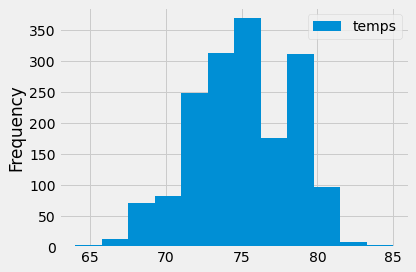

In [65]:
june_df.plot.hist(bins=12)
plt.tight_layout()

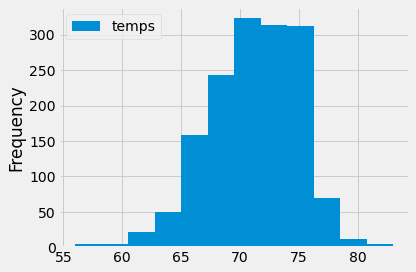

In [64]:
dec_df.plot.hist(bins=12)
plt.tight_layout()

NameError: name 'stats' is not defined

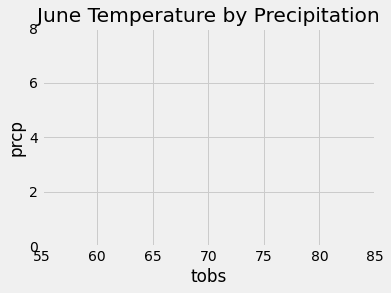

In [75]:
june_temp_prcp_df = pd.DataFrame(june_df, columns=['tobs','prcp'])
june_temp_prcp_df = june_temp_prcp_df.dropna()
june_temp_prcp_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('June Temperature by Precipitation')
plt.xlim([55, 85])
plt.ylim([0,8])

slope, intercept, r_value, p_value, std_err = stats.linregress(june_df['tobs'],june_df['prcp'])
sns.regplot(x='tobs', y='prcp', data=june_df, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")